# ルンゲ・クッタ法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set('notebook', 'whitegrid', 'dark', font_scale=2, rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

## オイラー法

$x'=f(t,x)$の初期値問題に対して漸化式
$$
    x_{n+1} = x_n + h f(t_n, x_n)
$$
によって近似解を計算する

In [2]:
def Euler(t, x, f, h):
    return x + h * f(t, x)

$x'=f(t,x)$の右辺の定義

In [3]:
def func(t,x):
    return x

In [4]:
a, b = 0.0, 1.0
N = 10
h = (b-a)/N
t = a
x = 1.0
X = np.zeros(N+1)
X[0] = x
for n in range(N):
    x = Euler(t, x, func, h)
    X[n+1] = x
    t = a + (n + 1) * h

Text(0, 0.5, '$x$')

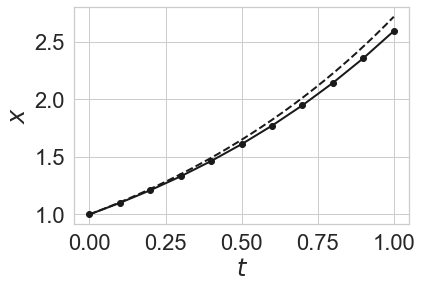

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,256), np.exp(np.linspace(a,b,256)), '--k')
ax.plot(np.linspace(a,b,N+1), X, 'o-k')
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
# plt.savefig("euler1.pdf", bbox_inches="tight")

Text(0, 0.5, 'error')

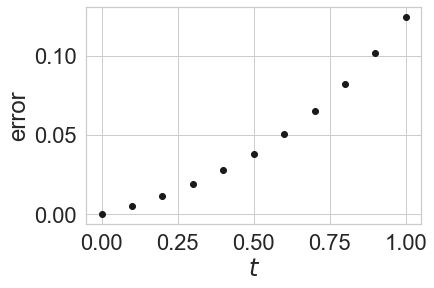

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,N+1), np.abs(X-np.exp(np.linspace(a,b,N+1))), 'ok')
ax.set_xlabel("$t$")
ax.set_ylabel("error")
# plt.savefig("euler1_error.pdf", bbox_inches="tight")

In [7]:
a, b = 0.0, 1.0
N = 100
h = (b-a)/N
t = a
x = 1.0
X = np.zeros(N+1)
X[0] = x
for n in range(N):
    x = Euler(t, x, func, h)
    X[n+1] = x
    t = a + (n + 1) * h

Text(0, 0.5, '$x$')

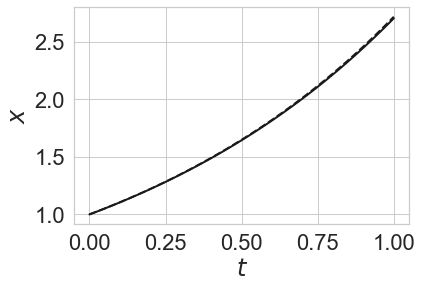

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,256), np.exp(np.linspace(a,b,256)), '--k')
ax.plot(np.linspace(a,b,N+1), X, '-k')
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
# plt.savefig("euler2.pdf", bbox_inches="tight")

Text(0, 0.5, 'error')

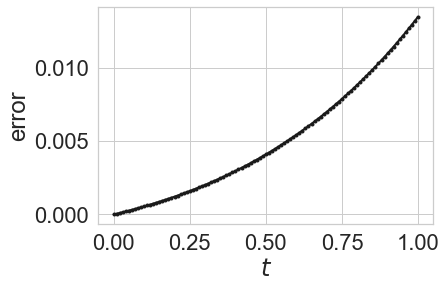

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,N+1), np.abs(X-np.exp(np.linspace(a,b,N+1))), '.-k')
ax.set_xlabel("$t$")
ax.set_ylabel("error")
# plt.savefig("euler2_error.pdf", bbox_inches="tight")

## ホイン法
\begin{align}
    k_1 &= f(t_n, x_n),\\
    k_2 &= f(t_n + h, x_n + h k_1),\\
    x_{n+1} &= x_n + \frac{h}{2} (k_1 + k_2)
\end{align}

In [10]:
def Heun(t, x, f, h):
    k1 = f(t, x) 
    k2 = f(t + h, x + h * k1)
    return x + 0.5 * h * (k1 + k2)

In [11]:
a, b = 0.0, 1.0
N = 10
h = (b-a)/N
t = a
x = 1.0
X2 = np.zeros(N+1)
X2[0] = x
for n in range(N):
    x = Heun(t, x, func, h)
    X2[n+1] = x
    t = a + (n + 1) * h

Text(0, 0.5, '$x$')

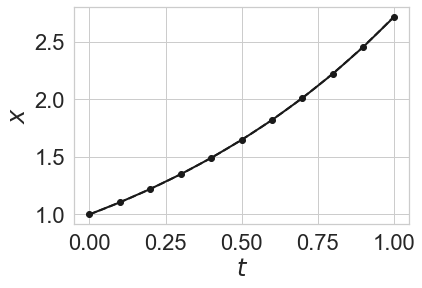

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,256), np.exp(np.linspace(a,b,256)), '--k')
ax.plot(np.linspace(a,b,N+1), X2, 'o-k')
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
# plt.savefig("heun1.pdf", bbox_inches="tight")

Text(0, 0.5, 'error')

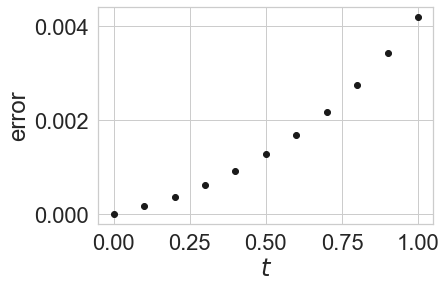

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,N+1), np.abs(X2-np.exp(np.linspace(a,b,N+1))), 'ok')
ax.set_xlabel("$t$")
ax.set_ylabel("error")
# plt.savefig("heun1_error.pdf", bbox_inches="tight")

## 古典的ルンゲ・クッタ法
$$
\begin{aligned}
k_1 &= f(t_n, x_n),\\
k_2 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2}k_1),\\
k_3 &= f(t_n + \tfrac{h}{2}, x_n + \tfrac{h}{2}k_2),\\
k_4 &= f(t_n + h, x_n + h k_3),\\
x_{n+1} &= x_n + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4)
\end{aligned}
$$

In [14]:
def RK4(t, x, f, h):
    k1 = f(t, x)
    k2 = f(t+0.5*h, x+0.5*h*k1)
    k3 = f(t+0.5*h, x+0.5*h*k2)
    k4 = f(t+h, x+h*k3)
    return x + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [15]:
a, b = 0.0, 1.0
N = 10
h = (b-a)/N
t = a
x = 1.0
X4 = np.zeros(N+1)
X4[0] = x
for n in range(N):
    x = RK4(t, x, func, h)
    X4[n+1] = x
    t = a + (n + 1) * h

Text(0, 0.5, '$x$')

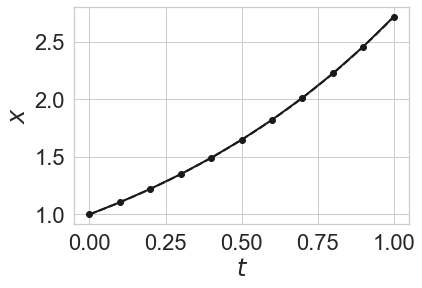

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,256), np.exp(np.linspace(a,b,256)), '--k')
ax.plot(np.linspace(a,b,N+1), X4, 'o-k')
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
# plt.savefig("rk1.pdf", bbox_inches="tight")

Text(0, 0.5, 'error')

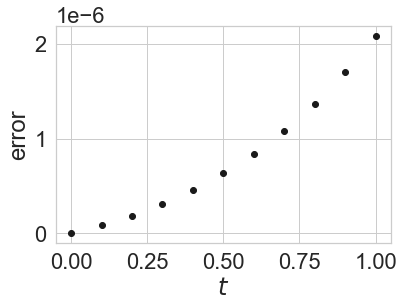

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.linspace(a,b,N+1), np.abs(X4-np.exp(np.linspace(a,b,N+1))), 'ok')
ax.set_xlabel("$t$")
ax.set_ylabel("error")
# plt.savefig("rk1_error.pdf", bbox_inches="tight")